In [95]:
##Paso1: importar librerias necesarias 
import pandas as pd
import numpy as np

from skimpy import skim
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [96]:
##Paso 2: Cargar la base de datos y ver las primeras filas con head 
df = pd.read_csv(r'C:\Users\CATALINA\OneDrive\Desktop\proyectoICAM\ReporteICAM.csv') 
df.head()

,ano,muestreo,departamento,estacion,coduer,sustrato,latitud,longitud,ca_cla,ca_cte,...,hdd,no3,od,ph,po4,sst,icam,icam_calificacion,num_variables,confianza
0,2018,2018--2,ATLANTICO,Bocas de Ceniza (B),C08001003,Agua Estuarina,11.104833,-74.853778,84.38,23.94,...,0.24,234.0,5.41,7.31,42.0,242.0,36.00,INADECUADA,7,0.87
1,2018,2018--1,ATLANTICO,C. Balboa,C08002011,Agua Estuarina,10.984842,-74.965589,21.19,93.86,...,0.18,-1.0,8.76,8.31,7.0,49.9,67.46,ACEPTABLE,6,0.78
2,2018,2018--2,ATLANTICO,C. Balboa,C08002011,Agua Estuarina,10.984842,-74.965589,47.18,82.66,...,0.16,12.9,9.42,8.25,-1.0,134.0,70.44,ADECUADA,6,0.75
3,2018,2018--1,ATLANTICO,C. Mallorquin-Playa,C08003042,Agua Estuarina,11.036472,-74.859806,22.16,NaN,...,0.47,6870.0,6.30,7.88,407.0,42.3,20.43,PESIMA,6,0.73
4,2018,2018--2,ATLANTICO,C. Mallorquin-Playa,C08003042,Agua Estuarina,11.036472,-74.859806,39.76,12.26,...,0.31,497.0,7.25,7.93,469.0,51.9,19.55,PESIMA,7,0.87


In [97]:
  ##Paso3: haremos exploracion de datos
df.dtypes

ano                    int64
muestreo              object
departamento          object
estacion              object
coduer                object
sustrato              object
latitud              float64
longitud             float64
ca_cla               float64
ca_cte               float64
ca_cot               float64
ca_hdd               float64
ca_no3               float64
ca_od                float64
ca_ph                float64
ca_po4               float64
ca_sst               float64
eval_cla              object
eval_cte              object
eval_cot              object
eval_hdd              object
eval_no3              object
eval_od               object
eval_ph               object
eval_sst              object
eval_po4              object
cot                  float64
cla                  float64
cte                  float64
hdd                  float64
no3                  float64
od                   float64
ph                   float64
po4                  float64
sst           

In [98]:
df.shape

(1715, 39)

In [99]:
df.columns

Index(['ano', 'muestreo', 'departamento', 'estacion', 'coduer', 'sustrato',
       'latitud', 'longitud', 'ca_cla', 'ca_cte', 'ca_cot', 'ca_hdd', 'ca_no3',
       'ca_od', 'ca_ph', 'ca_po4', 'ca_sst', 'eval_cla', 'eval_cte',
       'eval_cot', 'eval_hdd', 'eval_no3', 'eval_od', 'eval_ph', 'eval_sst',
       'eval_po4', 'cot', 'cla', 'cte', 'hdd', 'no3', 'od', 'ph', 'po4', 'sst',
       'icam', 'icam_calificacion', 'num_variables', 'confianza'],
      dtype='object')

In [100]:
icam = df

In [101]:
icam.rename(columns={
    'ano':'año', 'coduer':'codigo_estacion',  'ca_cla':'calidad_clorofilaa',
    'ca_cte':'calidad_coliformes_termotolerantes', 
    'ca_cot':'calidad_carbono_organico_total', 'ca_hdd':'calidad_hdd', 
    'ca_no3':'calidad_nitratos','ca_od':'calidad_oxigeno_disuelto', 
    'ca_ph':'calidad_ph', 'ca_po4':'calidad_ortofosfatos', 
    'ca_sst':'calidad_sst', 'eval_cla':'evaluacion_clorofilaa', 
    'eval_cte':'evaluacion_coliformes_termotolerantes',
    'eval_cot':'evaluacion_carbono_organico_total', 
    'eval_hdd':'evaluacion_hdd', 'eval_no3':'evaluacion_nitratos', 
    'eval_od':'evaluacion_oxigeno_disuelto', 'eval_ph':'evaluacion_ph', 
    'eval_sst':'evaluacion_sst','eval_po4':'evaluacion_ortofosfatos', 
    'cot':'carbono_organico_total', 'cla':'clorofilaa', 
    'cte':'coliformes_termotolerantes', 'hdd':'hidrocarburos_disueltos_dispersos', 
    'no3':'nitratos', 'od':'oxigeno_disuelto', 'po4':'ortofosfatos', 
    'sst':'solidos_suspendidos_totales', 
    }
                                 , inplace = True)

In [102]:
icam.columns

Index(['año', 'muestreo', 'departamento', 'estacion', 'codigo_estacion',
       'sustrato', 'latitud', 'longitud', 'calidad_clorofilaa',
       'calidad_coliformes_termotolerantes', 'calidad_carbono_organico_total',
       'calidad_hdd', 'calidad_nitratos', 'calidad_oxigeno_disuelto',
       'calidad_ph', 'calidad_ortofosfatos', 'calidad_sst',
       'evaluacion_clorofilaa', 'evaluacion_coliformes_termotolerantes',
       'evaluacion_carbono_organico_total', 'evaluacion_hdd',
       'evaluacion_nitratos', 'evaluacion_oxigeno_disuelto', 'evaluacion_ph',
       'evaluacion_sst', 'evaluacion_ortofosfatos', 'carbono_organico_total',
       'clorofilaa', 'coliformes_termotolerantes',
       'hidrocarburos_disueltos_dispersos', 'nitratos', 'oxigeno_disuelto',
       'ph', 'ortofosfatos', 'solidos_suspendidos_totales', 'icam',
       'icam_calificacion', 'num_variables', 'confianza'],
      dtype='object')

In [103]:
icam.info

<bound method DataFrame.info of        año muestreo     departamento             estacion codigo_estacion  \
0     2018  2018--2        ATLANTICO  Bocas de Ceniza (B)       C08001003   
1     2018  2018--1        ATLANTICO            C. Balboa       C08002011   
2     2018  2018--2        ATLANTICO            C. Balboa       C08002011   
3     2018  2018--1        ATLANTICO  C. Mallorquin-Playa       C08003042   
4     2018  2018--2        ATLANTICO  C. Mallorquin-Playa       C08003042   
...    ...      ...              ...                  ...             ...   
1710  2024  2024--1  VALLE DEL CAUCA         H. Palm View       P76001008   
1711  2024  2024--1  VALLE DEL CAUCA       Hotel Medellin       P76001005   
1712  2024  2024--1  VALLE DEL CAUCA             La Barra       P76001002   
1713  2024  2024--1  VALLE DEL CAUCA      P. Juan de Dios       P76001025   
1714  2024  2024--1  VALLE DEL CAUCA           P. Magüipi       P76002027   

            sustrato    latitud   longitud 

In [104]:
  ## describe exploramos estadistica descriptiva
icam.describe()

,año,latitud,longitud,calidad_clorofilaa,calidad_coliformes_termotolerantes,calidad_carbono_organico_total,calidad_hdd,calidad_nitratos,calidad_oxigeno_disuelto,calidad_ph,...,coliformes_termotolerantes,hidrocarburos_disueltos_dispersos,nitratos,oxigeno_disuelto,ph,ortofosfatos,solidos_suspendidos_totales,icam,num_variables,confianza
count,1715.000000,1715.000000,1715.000000,1088.000000,1373.000000,300.000000,837.000000,1032.000000,1695.000000,1695.000000,...,1.484000e+03,1280.000000,1620.000000,1695.000000,1695.000000,1651.00000,1671.000000,1715.000000,1715.000000,1715.000000
mean,2020.723032,9.742268,-76.225471,70.347371,68.799876,63.503567,95.413023,67.105601,80.872165,86.949038,...,1.607646e+04,-0.041884,31.256723,6.543776,8.151309,15.61472,36.450916,41.297708,5.690379,0.722047
std,2.041209,3.063488,2.709086,26.258699,33.719916,26.197492,6.036562,32.422691,14.943570,10.453862,...,4.184946e+05,0.874640,194.658194,1.309667,0.315319,94.31570,69.125339,37.206620,1.314268,0.157941
min,2018.000000,1.642861,-81.732481,21.190000,0.610000,14.600000,33.330000,0.180000,1.000000,7.470000,...,-1.000000e+00,-1.000000,-1.000000,0.360000,6.020000,-1.00000,-1.000000,-1.000000,1.000000,0.120000
25%,2019.000000,9.404033,-77.411713,49.820000,45.020000,40.452500,95.010000,47.825000,77.260000,84.470000,...,4.500000e+00,-1.000000,-1.000000,6.060000,8.070000,-1.00000,7.945000,-1.000000,5.000000,0.630000
50%,2021.000000,11.021056,-75.649731,78.370000,84.510000,64.305000,97.710000,85.955000,83.140000,88.780000,...,4.900000e+01,0.120000,4.020000,6.480000,8.172000,3.32000,17.600000,45.840000,6.000000,0.750000
75%,2022.000000,11.319567,-74.223054,94.475000,98.540000,90.005000,98.800000,91.315000,89.040000,92.380000,...,5.400000e+02,0.322500,20.175000,6.985000,8.280000,8.70500,38.200000,78.835000,7.000000,0.870000
max,2024.000000,13.385900,-71.981544,100.000000,100.000000,98.620000,99.240000,99.630000,100.000000,98.760000,...,1.600000e+07,8.600000,6870.000000,20.000000,9.930000,2100.00000,1604.000000,95.930000,8.000000,1.000000


In [105]:
### para la limpieza vamos a ver cuantos calores nulos y negativos hay en las columnas
# Calcula el porcentaje de nulos por columna mayores al 52% de los datos nulos para eliminarlos
porcentaje_nulos1 = (icam.isnull().mean() * 100)
nulos_mayores_50 = porcentaje_nulos1[porcentaje_nulos1 > 52]
print(nulos_mayores_50)

calidad_carbono_organico_total       82.507289
evaluacion_carbono_organico_total    82.507289
carbono_organico_total               80.233236
dtype: float64


In [106]:
##eliminamos las columnas que tienen valores nulos mayores al 52%
icam.drop(['carbono_organico_total', 'evaluacion_carbono_organico_total','calidad_carbono_organico_total'], axis=1, inplace=True)

In [107]:
# Calcula el porcentaje de nulos por columna menores al 52% para rellenarlos con la mediana
porcentaje_nulos2 = (icam.isnull().mean() * 100)
nulos_menores_50 = porcentaje_nulos2[porcentaje_nulos2  > 0]
print(nulos_menores_50)

calidad_clorofilaa                       36.559767
calidad_coliformes_termotolerantes       19.941691
calidad_hdd                              51.195335
calidad_nitratos                         39.825073
calidad_oxigeno_disuelto                  1.166181
calidad_ph                                1.166181
calidad_ortofosfatos                     35.276968
calidad_sst                               3.498542
evaluacion_clorofilaa                    36.559767
evaluacion_coliformes_termotolerantes    19.941691
evaluacion_hdd                           51.195335
evaluacion_nitratos                      39.825073
evaluacion_oxigeno_disuelto               1.166181
evaluacion_ph                             1.166181
evaluacion_sst                            3.498542
evaluacion_ortofosfatos                  35.276968
clorofilaa                               33.877551
coliformes_termotolerantes               13.469388
hidrocarburos_disueltos_dispersos        25.364431
nitratos                       

In [108]:
## Rellenamos nulos con la mediana en las columnas con valores numericos nulos menores al 52%
## las columnas de "evaluacion" son tipo texto así que se dejaran con valores nulos, ya que esto no afecta los analisis descriptivos
columnas_importantes = [
    'calidad_clorofilaa', 'calidad_coliformes_termotolerantes','calidad_hdd','calidad_nitratos',
    'calidad_oxigeno_disuelto','calidad_ph','calidad_ortofosfatos','calidad_sst','clorofilaa', 
    'coliformes_termotolerantes', 'hidrocarburos_disueltos_dispersos',
    'nitratos', 'oxigeno_disuelto', 'ph','ortofosfatos','solidos_suspendidos_totales',
    ]
for col in columnas_importantes:
    icam[col] = icam[col].fillna(icam[col].median())

In [109]:
icam.columns

Index(['año', 'muestreo', 'departamento', 'estacion', 'codigo_estacion',
       'sustrato', 'latitud', 'longitud', 'calidad_clorofilaa',
       'calidad_coliformes_termotolerantes', 'calidad_hdd', 'calidad_nitratos',
       'calidad_oxigeno_disuelto', 'calidad_ph', 'calidad_ortofosfatos',
       'calidad_sst', 'evaluacion_clorofilaa',
       'evaluacion_coliformes_termotolerantes', 'evaluacion_hdd',
       'evaluacion_nitratos', 'evaluacion_oxigeno_disuelto', 'evaluacion_ph',
       'evaluacion_sst', 'evaluacion_ortofosfatos', 'clorofilaa',
       'coliformes_termotolerantes', 'hidrocarburos_disueltos_dispersos',
       'nitratos', 'oxigeno_disuelto', 'ph', 'ortofosfatos',
       'solidos_suspendidos_totales', 'icam', 'icam_calificacion',
       'num_variables', 'confianza'],
      dtype='object')

In [110]:
# necesitamos saber que columnas tiene valores negativos para cambiarlos
# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns
# Contar negativos para cada columna
conteo_negativos = (df[columnas_numericas] < 0).sum()

conteo_negativos = conteo_negativos.reset_index()
conteo_negativos.columns = ['variable', 'cantidad_negativos']

print(conteo_negativos)


                              variable  cantidad_negativos
0                                  año                   0
1                              latitud                   0
2                             longitud                1715
3                   calidad_clorofilaa                   0
4   calidad_coliformes_termotolerantes                   0
5                          calidad_hdd                   0
6                     calidad_nitratos                   0
7             calidad_oxigeno_disuelto                   0
8                           calidad_ph                   0
9                 calidad_ortofosfatos                   0
10                         calidad_sst                   0
11                          clorofilaa                  46
12          coliformes_termotolerantes                 111
13   hidrocarburos_disueltos_dispersos                 443
14                            nitratos                 588
15                    oxigeno_disuelto                  

In [111]:
## Reemplazar valores negativos por NaN en esas variables
variables_a_corregir = [
    'clorofilaa',
    'coliformes_termotolerantes', 
    'nitratos', 'ortofosfatos'
]
for var in variables_a_corregir:
    df.loc[:, var] = df[var].apply(lambda x: np.nan if x < 0 else x)


In [112]:
icam['año'].value_counts()


año
2019    335
2018    320
2021    275
2022    238
2023    220
2024    201
2020    126
Name: count, dtype: int64

In [113]:
### uso el nunique ojo, no es unique)
icam.groupby('año')['estacion'].nunique()


año
2018    178
2019    177
2020     86
2021    200
2022    164
2023    177
2024    185
Name: estacion, dtype: int64

In [114]:
icam.groupby('año')['estacion'].count()

año
2018    320
2019    335
2020    126
2021    275
2022    238
2023    220
2024    201
Name: estacion, dtype: int64

In [115]:
repetidas = icam.groupby(['año', 'estacion']).size().reset_index(name='conteo')
repetidas = repetidas[repetidas['conteo'] > 1]
print(repetidas)


       año          estacion  conteo
0     2018        Aeropuerto       2
2     2018           Alcalis       2
4     2018        Alcatraces       2
5     2018    Antiguo Muelle       2
6     2018     Arco el Morro       2
...    ...               ...     ...
1129  2024           P. Rula       2
1140  2024        P. Venados       2
1141  2024   P. los Córdobas       2
1158  2024       S. Bernardo       2
1163  2024  Sinu - Tinajones       2

[479 rows x 3 columns]


In [116]:
repetidas_2019 = repetidas[repetidas['año'] == 2019]
display(repetidas_2019)

,año,estacion,conteo
182,2019,Aeropuerto,2
183,2019,Agua Dulce,3
185,2019,Alcantarillado,4
186,2019,Alcatraces,2
188,2019,Arco el Morro,2
...,...,...,...
350,2019,TermoGuajira,2
351,2019,Vertimiento Gorgona,2
352,2019,Vertimiento Riohacha,2
353,2019,Yellow Moon,3


In [117]:
repetidas_estacion = repetidas[(repetidas['año'] == 2019) & (repetidas['estacion'] == 'Yellow Moon')]
display(repetidas_estacion)

,año,estacion,conteo
353,2019,Yellow Moon,3


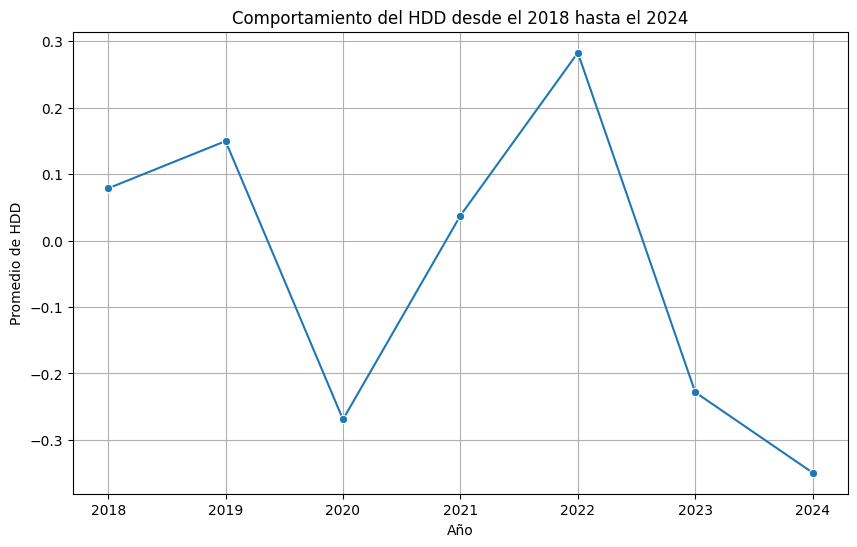

In [118]:
icam['año'] = icam['año'].astype(int)

# Agrupar por año para calcular la media de HDD por cada estacion de medicion.
hdd_por_año = icam.groupby('año')['hidrocarburos_disueltos_dispersos'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=hdd_por_año, x='año', y='hidrocarburos_disueltos_dispersos', marker='o')
plt.title('Comportamiento del HDD desde el 2018 hasta el 2024')
plt.xlabel('Año')
plt.ylabel('Promedio de HDD')
plt.grid(True)
plt.show()

In [119]:
print(icam['año'].head())

0    2018
1    2018
2    2018
3    2018
4    2018
Name: año, dtype: int64


In [120]:
# Ver cuántos valores negativos tienes
print(df[df['hidrocarburos_disueltos_dispersos'] < 0])

# Eliminar valores negativos de hdd
#   df = df[df['hidrocarburos_disueltos_dispersos'] >= 0]

       año muestreo     departamento             estacion codigo_estacion  \
8     2018  2018--2        ATLANTICO          P. Pradomar       C08001007   
10    2018  2018--2        ATLANTICO   P. Puerto Colombia       C08002015   
74    2018  2018--1            CAUCA           Gorgonilla       P19003004   
78    2018  2018--1            CAUCA            P. Blanca       P19003002   
79    2018  2018--2            CAUCA            P. Blanca       P19003002   
...    ...      ...              ...                  ...             ...   
1698  2024  2024--1            SUCRE         Punta Rincón       C70001003   
1699  2024  2024--1            SUCRE           Santa Cruz       C70001001   
1707  2024  2024--1  VALLE DEL CAUCA         F. R. Raposo       P76003038   
1709  2024  2024--1  VALLE DEL CAUCA  F. cabañas Carvajal       P76001004   
1714  2024  2024--1  VALLE DEL CAUCA           P. Magüipi       P76002027   

            sustrato    latitud   longitud  calidad_clorofilaa  \
8        

In [121]:
##cambiar los valores negativos por la media

variables = ['']

for var in variables:
    # Calcula la media solo con los valores válidos (mayores o iguales a 0)
    media = df[df[var] >= 0][var].mean()

    # Reemplaza los valores negativos con esa media
    df.loc[df[var] < 0, var] = media

KeyError: ''

In [ ]:
# creamos el tamaño de la grafica
plt.figure(figsize=(10, 6))
#creamos el histograma con hue par aclasificar, hue es para una variable categorica
sns.histplot(data=icam, x = "hidrocarburos_disueltos_dispersos", hue= "año",  edgecolor="k"  )  #utilizo el data por que ya estoy utilizando varrais varialbes
##establezco titulo para el grafico)
plt.title("Distribucion de hdd al año")            ###Establezco titulo de la grafica
plt.xlabel("hhd")                    ### Establezco titulo para el eje x
plt.ylabel("año")            ### Establezco titulo para el eje y
plt.show()

ValueError: Could not interpret value `df` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>